In [46]:
# 구글 드라이브 연결

from google.colab import drive
import shutil
import os

drive.mount('/content/drive')

project_path = '/content/drive/MyDrive/examples/2장/data'
os.makedirs(project_path, exist_ok=True)

# 현재 경로를 /content/drive로 설정
os.chdir(project_path)
print("현재 작업 디렉토리:", os.getcwd())
os.listdir(project_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
현재 작업 디렉토리: /content/drive/MyDrive/examples/2장/data


['titanic.csv',
 'vtest.avi',
 'dog.png',
 'cat.png',
 'sudoku.jpeg',
 'heart.png',
 'heart_gray.png',
 'heart_rgb.png',
 'shipsnet.json',
 'shipsnet_balanced_100.json',
 'darknet',
 'dance.mov',
 'output.avi']

In [13]:
import numpy as np
import json
from matplotlib import pyplot as plt
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score

# https://www.kaggle.com/datasets/rhammell/ships-in-satellite-imagery
# 데이터셋 정보가 담긴 json 파일 로드
f = open(r'./shipsnet_balanced_100.json')
dataset = json.load(f)
f.close()

dataset.keys()

dict_keys(['data', 'labels'])

In [48]:
dataset['labels']

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

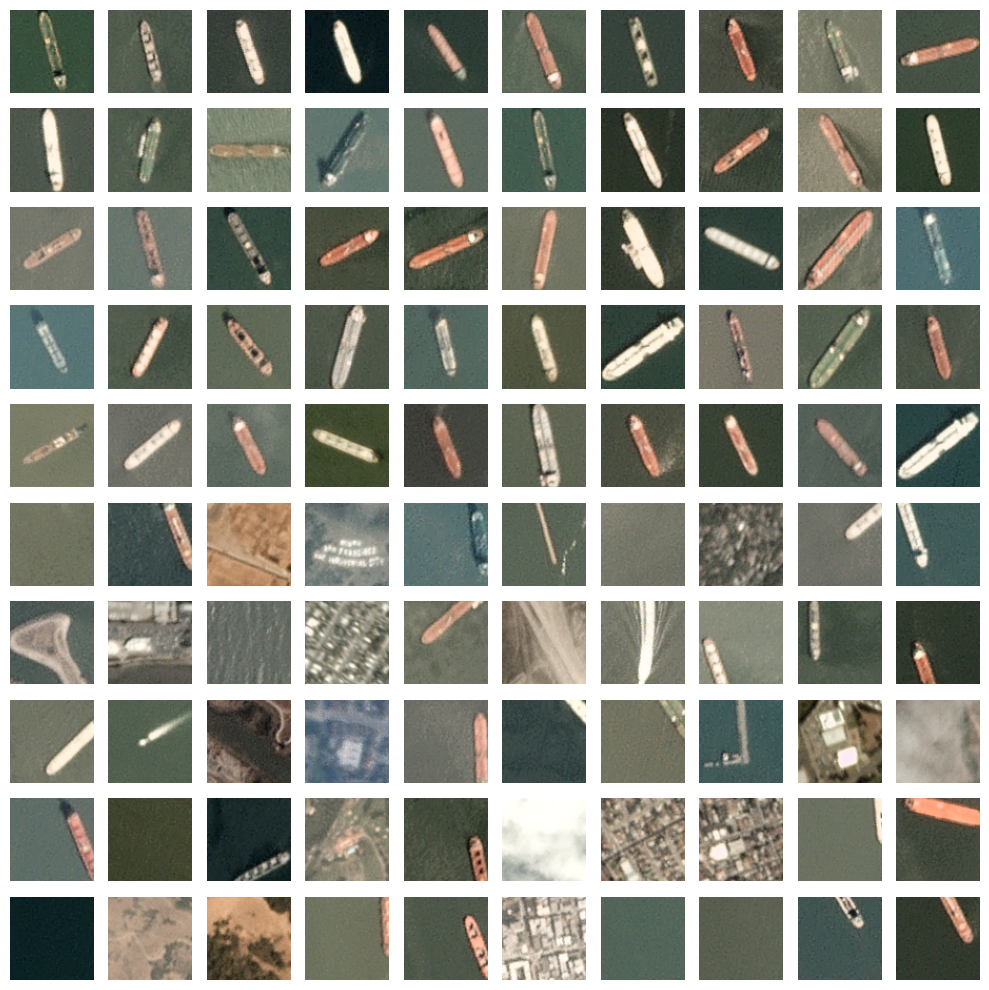

In [47]:
# JSON 데이터 변환
data = np.array(dataset['data']).astype('uint8')

# 이미지 크기 설정
img_length = 80  # 원본 이미지 크기 (80x80)
num_images = min(100, len(data))  # 최대 100개만 출력

# 이미지 변환 (80x80x3 형태로 복원)
data = data.reshape(-1, 3, img_length, img_length).transpose([0, 2, 3, 1])

# 캔버스 크기 설정 (10x10)
fig, axes = plt.subplots(10, 10, figsize=(10, 10))  # 10x10 그리드, 크기 설정

# 이미지 채우기
for i, ax in enumerate(axes.flat):
    if i < num_images:
        ax.imshow(data[i])
        ax.axis("off")  # 축 제거

# 캔버스 출력
plt.tight_layout()
plt.show()

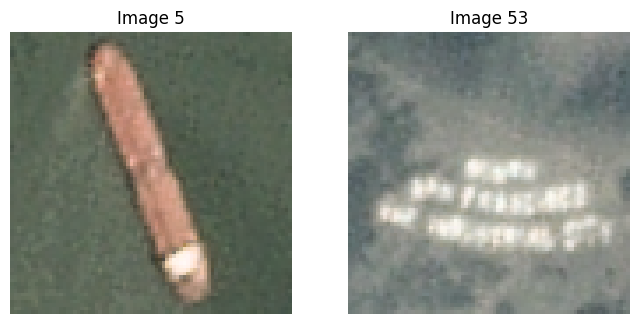

In [49]:
data = np.array(dataset['data']).astype('uint8')
img_length = 80
data = data.reshape(-1,3,img_length,img_length).transpose([0,2,3,1])

# 샘플 이미지 인덱스
idx1, idx2 = 5, 53

# 시각화
plt.figure(figsize=(8, 4))  # 가로 8인치, 세로 4인치 크기 설정

# 첫 번째 이미지 (data[5])
plt.subplot(1, 2, 1)  # 1행 2열 중 첫 번째
plt.imshow(data[idx1])
plt.title(f"Image {idx1}")
plt.axis("off")

# 두 번째 이미지 (data[53])
plt.subplot(1, 2, 2)  # 1행 2열 중 두 번째
plt.imshow(data[idx2])
plt.title(f"Image {idx2}")
plt.axis("off")

# 그래프 출력
plt.show()

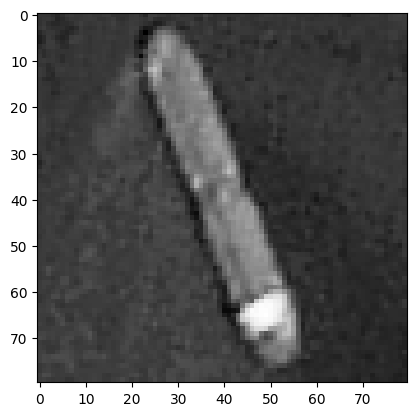

In [50]:
# 이미지를 모두 그레이스케일로 변환
# : 신호등 색상과 같이 색상이 중요한 특징으로 작용하는 경우가 아니라면
#   그레이스케일로 변환하는 것이 객체의 고유한 특성을 더 정확히 분석할 수 있다.

data_gray = [ color.rgb2gray(i) for i in data]
plt.imshow(data_gray[5], cmap='gray')

In [51]:
# hog descriptor 학습
# hog = 이미지를 그리드로 나눈 후, 각 그리드 내의 객체의 방향(그래디언트)을 데이터화 한 것

ppc = 16
hog_images = []
hog_features = []
for image in data_gray:
    fd,hog_image = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualize=True)
    hog_images.append(hog_image)
    hog_features.append(fd)

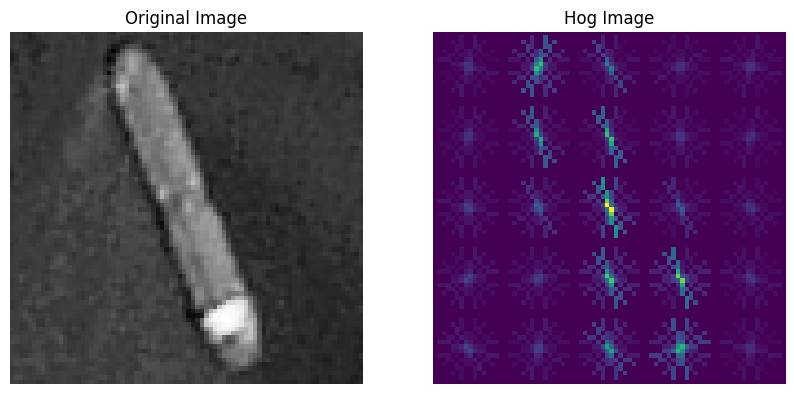

In [52]:
# 이미지 시각화
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# 원본 이미지 시각화
axs[0].imshow(data_gray[5], cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

# 추출한 hog 정보 시각화
axs[1].imshow(hog_images[5])
axs[1].set_title('Hog Image')
axs[1].axis('off')

plt.show()

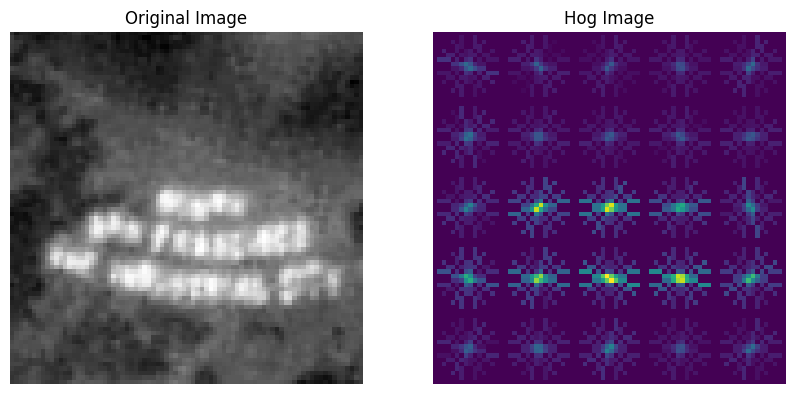

In [53]:
# 이미지 시각화
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# 원본 이미지 시각화
axs[0].imshow(data_gray[53], cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

# 추출한 hog 정보 시각화
axs[1].imshow(hog_images[53])
axs[1].set_title('Hog Image')
axs[1].axis('off')

plt.show()

In [58]:
hog_features[0].shape

# 512 features per image

(512,)

In [59]:
# SVM Classifier 초기화
clf = svm.SVC()

labels =  np.array(dataset['labels']).reshape(len(dataset['labels']),1)
hog_features = np.array(hog_features)

# hog 특징과 레이블 정보를 하나의 데이터 프레임에 통합
data_frame = np.hstack((hog_features, labels))
np.random.shuffle(data_frame)

In [110]:
percentage = 70
partition = int(len(hog_features)*percentage/100)

# 학습/테스트 데이터 분리 = 8 : 2
x_train, x_test = data_frame[:partition,:-1],  data_frame[partition:,:-1]
y_train, y_test = data_frame[:partition,-1:].ravel() , data_frame[partition:,-1:].ravel()
y_train = y_train.reshape(70, 1)
y_test = y_test.reshape(30, 1)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((70, 512), (30, 512), (70, 1), (30, 1))

In [111]:
# 모델 학습
clf.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [126]:
y_pred = clf.predict(x_test)

print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy: 1.0


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

